In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('/kaggle/input/churn-prediction/Customer_Churn_Prediction.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


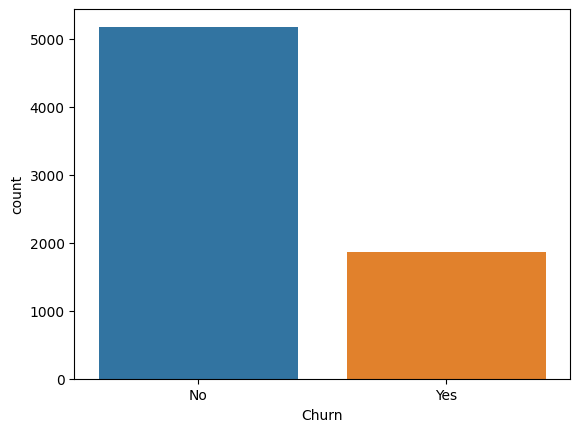

In [3]:
sns.countplot(data=df, x='Churn')
plt.show()

In [4]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [5]:
Churned = df[df.Churn == 'Yes'].shape[0]
retained = df[df.Churn == 'No'].shape[0]

In [6]:
#customer Left the company
ch_per = ((retained / (Churned + retained)) *100 )
ch_per

73.4630129206304

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162289,32.370865,64.761692
std,0.368742,24.559231,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Visualization

<Axes: xlabel='gender', ylabel='count'>

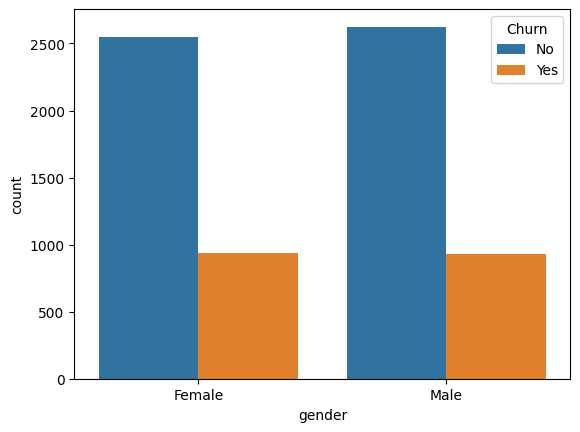

In [9]:
sns.countplot(x='gender',hue='Churn',data = df)

In [10]:
df['gender'].value_counts()


gender
Male      3555
Female    3488
Name: count, dtype: int64

<Axes: xlabel='MultipleLines', ylabel='count'>

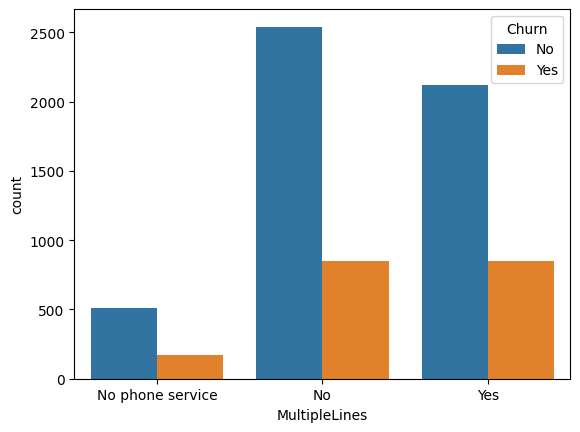

In [11]:
sns.countplot(x='MultipleLines',hue='Churn',data = df)

<Axes: xlabel='InternetService', ylabel='count'>

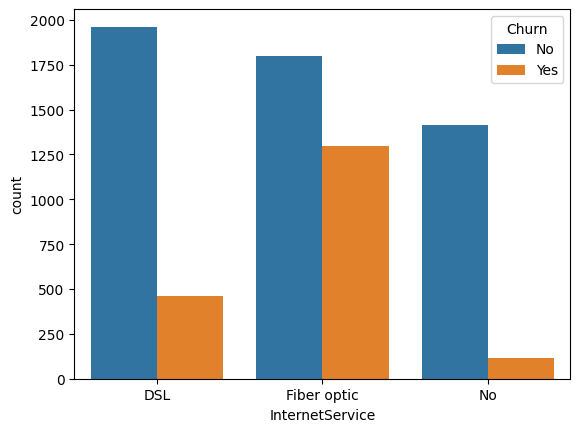

In [12]:
sns.countplot(x='InternetService',hue='Churn',data = df)

<Axes: xlabel='SeniorCitizen', ylabel='count'>

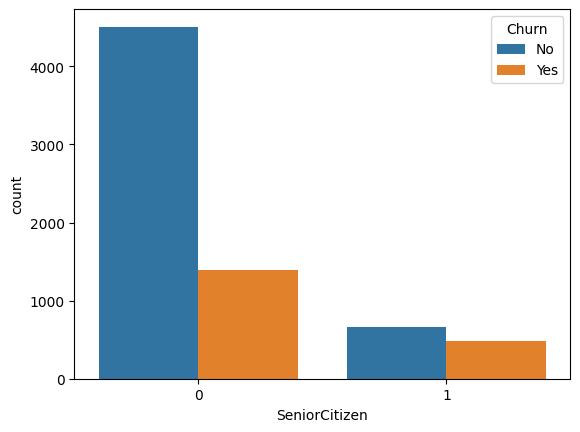

In [13]:
sns.countplot(x='SeniorCitizen',hue='Churn',data = df)

<Axes: xlabel='Partner', ylabel='count'>

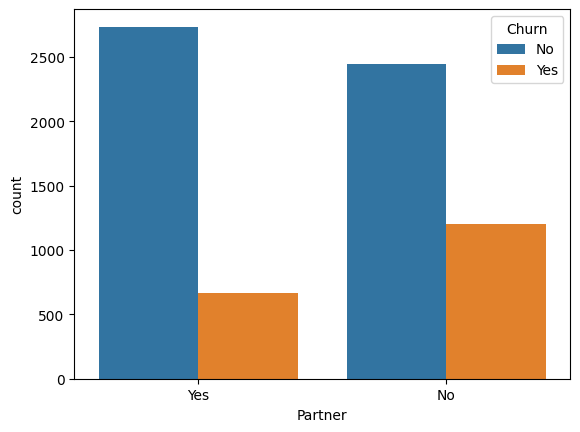

In [14]:
sns.countplot(x='Partner',hue='Churn',data = df)

<Axes: xlabel='Dependents', ylabel='count'>

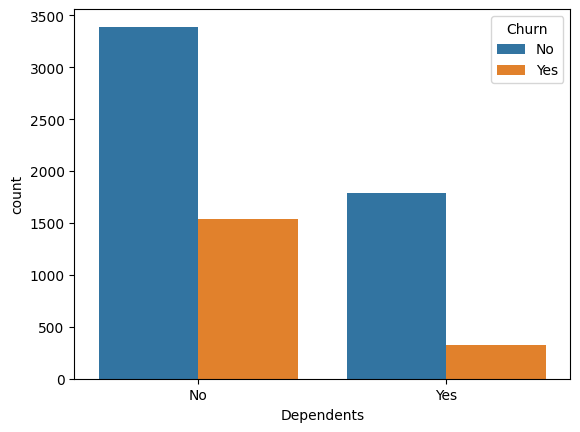

In [15]:
sns.countplot(x='Dependents',hue='Churn',data = df)

<Axes: xlabel='tenure', ylabel='count'>

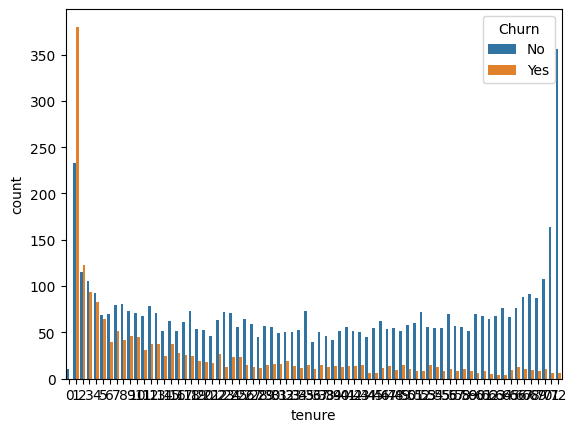

In [16]:
sns.countplot(x='tenure',hue='Churn',data = df)

<Axes: xlabel='PhoneService', ylabel='count'>

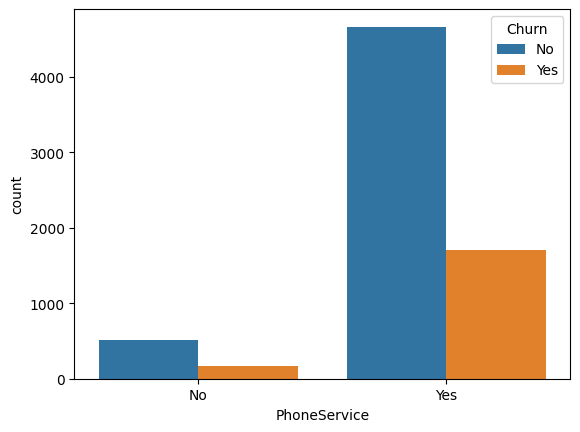

In [17]:
sns.countplot(x='PhoneService',hue='Churn',data = df)

<Axes: xlabel='OnlineSecurity', ylabel='count'>

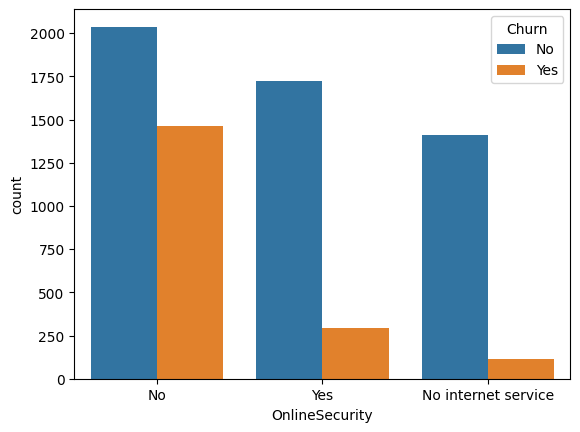

In [18]:
sns.countplot(x='OnlineSecurity',hue='Churn',data = df)

<Axes: xlabel='DeviceProtection', ylabel='count'>

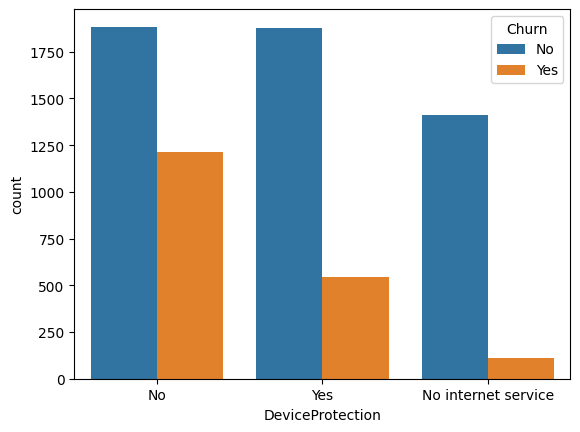

In [19]:
sns.countplot(x='DeviceProtection',hue='Churn',data = df)

<Axes: xlabel='TechSupport', ylabel='count'>

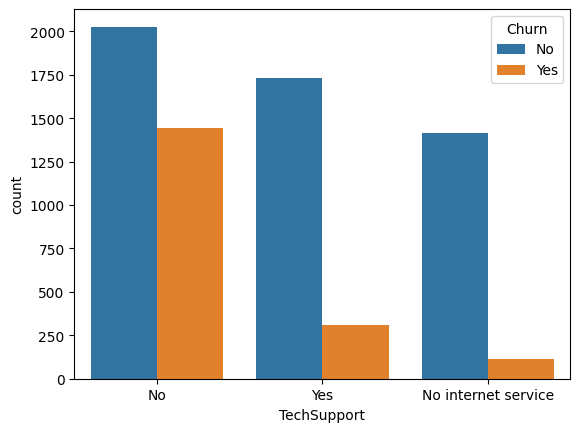

In [20]:
sns.countplot(x='TechSupport',hue='Churn',data = df)

<Axes: xlabel='StreamingTV', ylabel='count'>

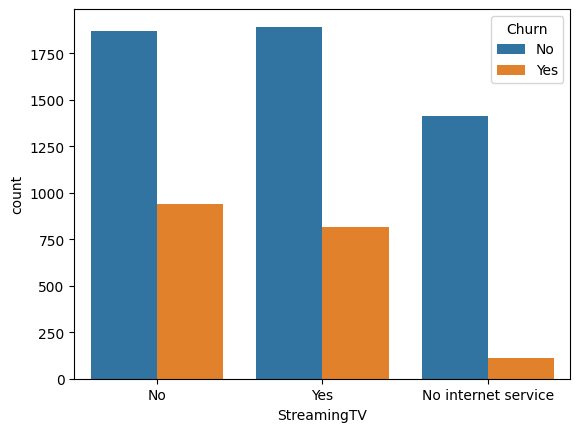

In [21]:
sns.countplot(x='StreamingTV',hue='Churn',data = df)

<Axes: xlabel='StreamingMovies', ylabel='count'>

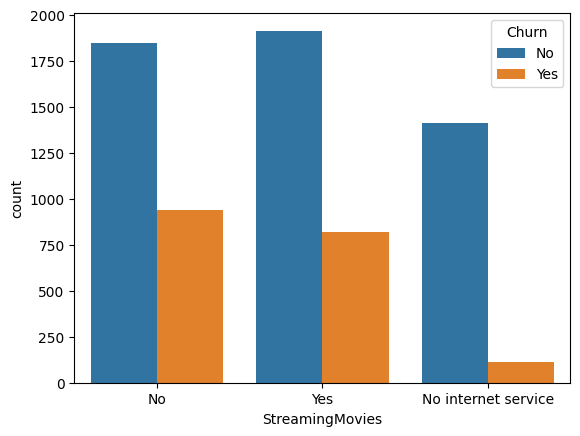

In [22]:
sns.countplot(x='StreamingMovies',hue='Churn',data = df)

<Axes: xlabel='Contract', ylabel='count'>

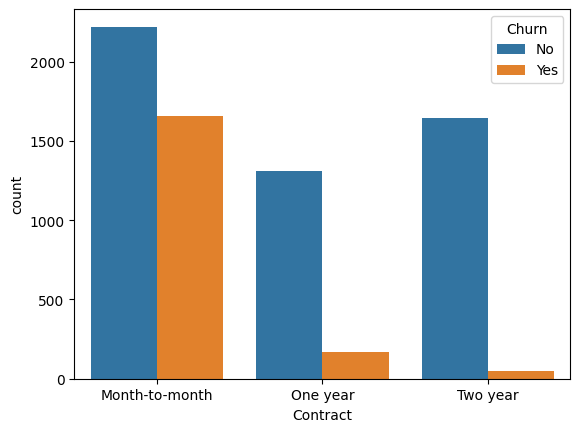

In [23]:
sns.countplot(x='Contract',hue='Churn',data = df) 

<Axes: xlabel='PaperlessBilling', ylabel='count'>

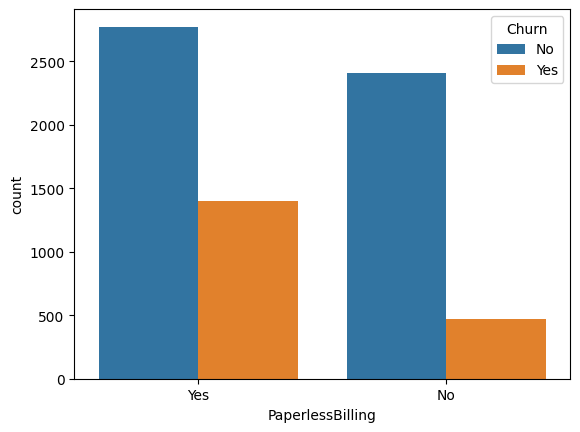

In [24]:
sns.countplot(x='PaperlessBilling',hue='Churn',data = df) 

<Axes: xlabel='PaymentMethod', ylabel='count'>

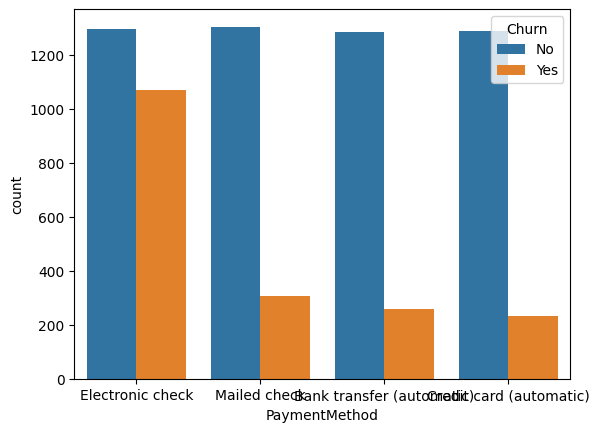

In [25]:
sns.countplot(x='PaymentMethod',hue='Churn',data = df) 

<Axes: xlabel='MonthlyCharges', ylabel='count'>

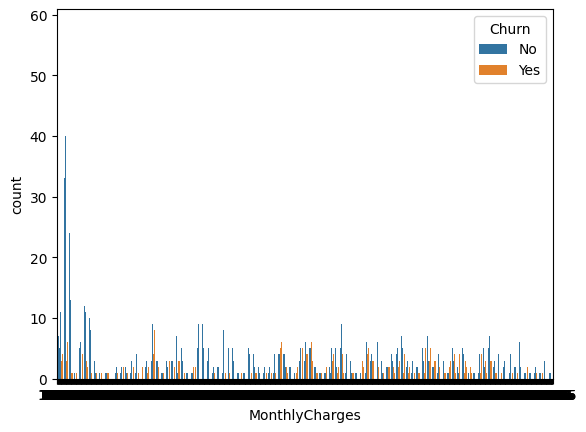

In [26]:
sns.countplot(x='MonthlyCharges',hue='Churn',data = df) 

# Preprocessing Data

In [27]:
#Drop Customer ID
df = df.drop('customerID',axis=1)
x = df.drop('Churn',axis=1)
y = df['Churn']


In [28]:
df = LabelEncoder()
for col in x.columns:
    if x[col].dtype == 'object':
        x[col] = df.fit_transform(x[col])

In [29]:
df

LabelEncoder()

In [30]:
feature_x = StandardScaler().fit_transform(x)

In [31]:
feature_x 

array([[-1.00955867, -0.44014635,  1.03453023, ...,  0.39855772,
        -1.16032292, -0.39860759],
       [ 0.99053183, -0.44014635, -0.96662231, ...,  1.33486261,
        -0.25962894, -0.94876238],
       [ 0.99053183, -0.44014635, -0.96662231, ...,  1.33486261,
        -0.36266036, -1.64188328],
       ...,
       [-1.00955867, -0.44014635,  1.03453023, ...,  0.39855772,
        -1.1686319 , -0.13968008],
       [ 0.99053183,  2.27197156,  1.03453023, ...,  1.33486261,
         0.32033821, -0.31653445],
       [ 0.99053183, -0.44014635, -0.96662231, ..., -1.47405205,
         1.35896134,  1.13801338]])

# Slipt Data

In [32]:
xtrain,xtest,ytrain,ytest = train_test_split(feature_x,y,test_size = 0.25,random_state=42)

In [33]:
xtest

array([[-1.00955867, -0.44014635,  1.03453023, ...,  0.39855772,
        -1.32816441, -0.642709  ],
       [ 0.99053183, -0.44014635, -0.96662231, ..., -1.47405205,
        -1.31320824,  1.72841048],
       [-1.00955867, -0.44014635,  1.03453023, ...,  1.33486261,
        -1.50930029, -1.68953865],
       ...,
       [ 0.99053183, -0.44014635, -0.96662231, ..., -0.53774716,
         0.20401242, -0.89369395],
       [-1.00955867, -0.44014635, -0.96662231, ...,  0.39855772,
        -0.99912861,  0.94421487],
       [-1.00955867,  2.27197156, -0.96662231, ..., -0.53774716,
         0.30039665,  0.08588868]])

# Build Logistic regression Model


In [34]:
model = LogisticRegression()

In [35]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [36]:
pred = model.predict(xtest)

In [37]:
pred

array(['Yes', 'No', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

# Performancs Metrics

In [38]:
#accuracy_score
accuracy_score(ytest,pred)

0.8103350369108461

In [39]:
#confussion matrix
confusion_matrix(ytest, pred)


array([[1163,  119],
       [ 215,  264]])

In [40]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

          No       0.84      0.91      0.87      1282
         Yes       0.69      0.55      0.61       479

    accuracy                           0.81      1761
   macro avg       0.77      0.73      0.74      1761
weighted avg       0.80      0.81      0.80      1761

